In [1]:
import torch
import torchvision
import torch.nn.functional as F
import torchvision.transforms.functional as VisF
import torch.optim as optim
from torch.distributions.normal import Normal

In [2]:
%load_ext autoreload
%autoreload 2
from lib.vae.model import VAE, loss_function, kl_divergence
from lib.vae.train_test import train, test
from lib.vae.inference import encode_dataset, reconstruct, generate
from lib.vae.plot import plot_latent_representation, plot_reconstructed, plot_generated,plot_loss

### Read MNIST dataset

In [3]:
mnist_train_dataset = torchvision.datasets.MNIST('./datasets', train=True, download=True,
    transform=torchvision.transforms.ToTensor())
mnist_test_dataset = torchvision.datasets.MNIST('./datasets', train=False, download=True,
    transform=torchvision.transforms.ToTensor())

In [4]:
BATCH_SIZE = 128
train_loader = torch.utils.data.DataLoader(
    mnist_train_dataset, batch_size=BATCH_SIZE,shuffle=True
)
test_loader = torch.utils.data.DataLoader(
    mnist_test_dataset, batch_size=BATCH_SIZE, shuffle=True
)

In [5]:
first_batch, _ = next(iter(test_loader))

### Define 15 samples, which will be reconstructed

In [6]:
test_15 = first_batch[:15]
test_15.shape

torch.Size([15, 1, 28, 28])

### Define the model

In [7]:
vae = VAE(
    x_dim = 28 * 28,
    enc_hid_dim_1 = 256, 
    enc_hid_dim_2 = 256, 
    z_dim = 2, 
    dec_hid_dim_1 = 256, 
    dec_hid_dim_2 = 256
)

### Check if cuda is available, and load the model if it is 

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vae.to(device)

VAE(
  (ehl1): Linear(in_features=784, out_features=256, bias=True)
  (ehl2): Linear(in_features=256, out_features=256, bias=True)
  (eout1): Linear(in_features=256, out_features=2, bias=True)
  (eout2): Linear(in_features=256, out_features=2, bias=True)
  (dhl1): Linear(in_features=2, out_features=256, bias=True)
  (dhl2): Linear(in_features=256, out_features=256, bias=True)
  (dout): Linear(in_features=256, out_features=784, bias=True)
  (dout_norm): Sigmoid()
)

### Initialize the optimizer

In [9]:
optimizer = optim.Adam(vae.parameters(), lr=1e-4)

### Train and evaluate the results

#### 2D latent space

====> Epoch: 1 Average loss: 67.4226


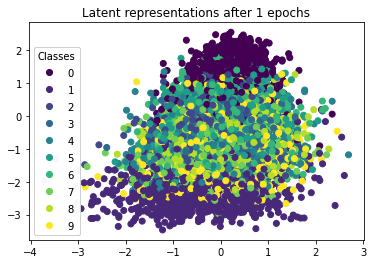

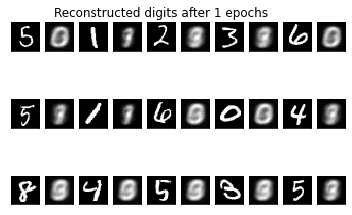

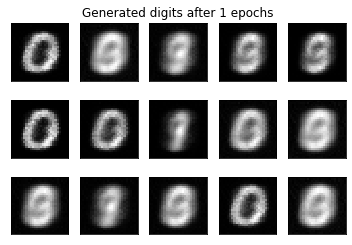

Test set loss: 49.42654307861328. Converged: False
====> Epoch: 2 Average loss: 47.5562
Test set loss: 45.68218650512695. Converged: False
====> Epoch: 3 Average loss: 44.6374
Test set loss: 43.7185391784668. Converged: False
====> Epoch: 4 Average loss: 43.2412
Test set loss: 42.47446735229492. Converged: False
====> Epoch: 5 Average loss: 42.1514


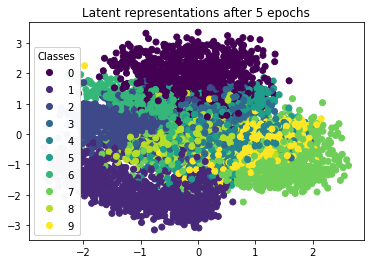

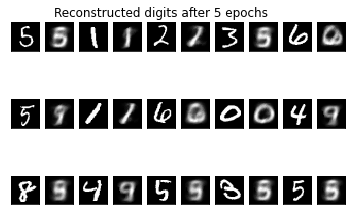

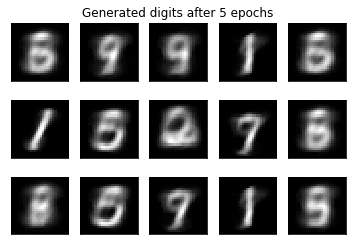

Test set loss: 41.47693615722656. Converged: False
====> Epoch: 6 Average loss: 41.2791
Test set loss: 40.60611063842774. Converged: False
====> Epoch: 7 Average loss: 40.5001
Test set loss: 39.942694519042966. Converged: False
====> Epoch: 8 Average loss: 39.8583
Test set loss: 39.37359287109375. Converged: False
====> Epoch: 9 Average loss: 39.3166
Test set loss: 38.94281262207031. Converged: False
====> Epoch: 10 Average loss: 38.8753
Test set loss: 38.52273536987305. Converged: False
====> Epoch: 11 Average loss: 38.4654
Test set loss: 38.15464146118164. Converged: False
====> Epoch: 12 Average loss: 38.1060
Test set loss: 37.81586477661133. Converged: False
====> Epoch: 13 Average loss: 37.7686
Test set loss: 37.58311353149414. Converged: False
====> Epoch: 14 Average loss: 37.4828
Test set loss: 37.345172564697265. Converged: False
====> Epoch: 15 Average loss: 37.1997
Test set loss: 37.06493220214844. Converged: False
====> Epoch: 16 Average loss: 36.9549
Test set loss: 36.81421

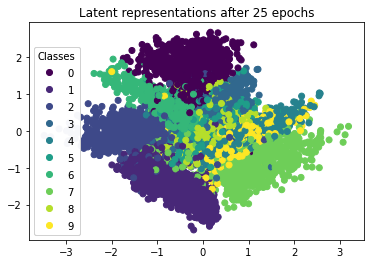

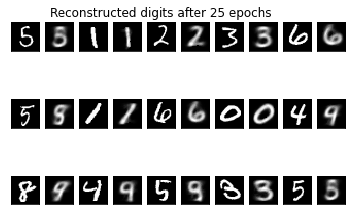

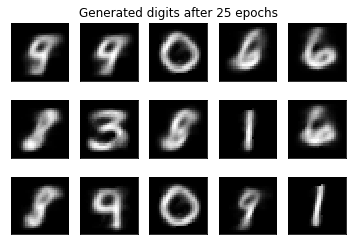

Test set loss: 35.55299247436523. Converged: False
====> Epoch: 26 Average loss: 35.3104
Test set loss: 35.39583189086914. Converged: False
====> Epoch: 27 Average loss: 35.1958
Test set loss: 35.31419539794922. Converged: False
====> Epoch: 28 Average loss: 35.0943
Test set loss: 35.24044816894531. Converged: False
====> Epoch: 29 Average loss: 34.9837
Test set loss: 35.15690546875. Converged: False
====> Epoch: 30 Average loss: 34.8936
Test set loss: 35.07972377929688. Converged: False
====> Epoch: 31 Average loss: 34.7839
Test set loss: 34.96452603759766. Converged: False
====> Epoch: 32 Average loss: 34.6973
Test set loss: 34.94041576538086. Converged: False
====> Epoch: 33 Average loss: 34.6107
Test set loss: 34.8262691772461. Converged: False
====> Epoch: 34 Average loss: 34.5082
Test set loss: 34.79194703979492. Converged: False
====> Epoch: 35 Average loss: 34.4314
Test set loss: 34.73568041381836. Converged: False
====> Epoch: 36 Average loss: 34.3565
Test set loss: 34.6571697

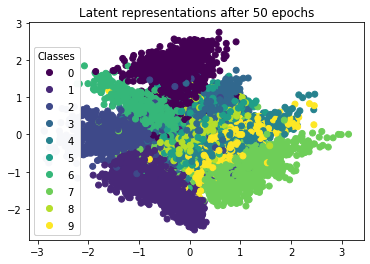

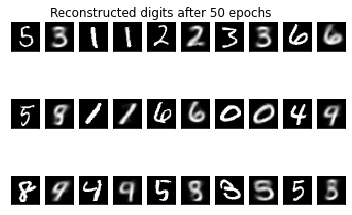

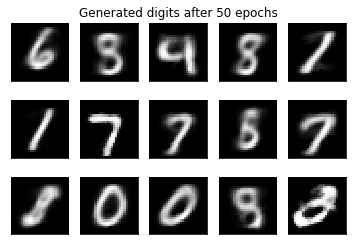

Test set loss: 33.992705078125. Converged: False
====> Epoch: 51 Average loss: 33.3956
Test set loss: 33.94633588256836. Converged: False
====> Epoch: 52 Average loss: 33.3416
Test set loss: 33.94213021240235. Converged: False
====> Epoch: 53 Average loss: 33.2935
Test set loss: 33.94060795288086. Converged: False
====> Epoch: 54 Average loss: 33.2466
Test set loss: 33.84524936523437. Converged: False
====> Epoch: 55 Average loss: 33.1963
Test set loss: 33.80076494140625. Converged: False
====> Epoch: 56 Average loss: 33.1549
Test set loss: 33.777734338378906. Converged: False
====> Epoch: 57 Average loss: 33.1067
Test set loss: 33.78068390197754. Converged: False
====> Epoch: 58 Average loss: 33.0650
Test set loss: 33.66130904541016. Converged: False
====> Epoch: 59 Average loss: 33.0286
Test set loss: 33.68905948791504. Converged: False
====> Epoch: 60 Average loss: 32.9735
Test set loss: 33.59501049194336. Converged: False
====> Epoch: 61 Average loss: 32.9298
Test set loss: 33.6722

In [10]:
min_loss = 1e6
epochs_without_improvement = 0
patience = 2
converged = False
test_loss_per_epoch = []
epoch = 0
while not converged:
    epoch += 1
    train(epoch, vae, train_loader, optimizer, loss_function, 10)
    test_loss = test(vae, test_loader, loss_function)
    test_loss_per_epoch.append(test_loss)

    if (epoch in [1, 5, 25, 50]):
        test_set_embedded, test_set_targets = encode_dataset(vae, test_loader)
        plot_latent_representation(test_set_embedded, test_set_targets, 'Latent representations after {} epochs'.format(epoch))

        r_test_15 = reconstruct(vae, test_15)
        plot_reconstructed(test_15.numpy(), r_test_15.numpy(), 'Reconstructed digits after {} epochs'.format(epoch))

        generated = generate(vae, 15)
        plot_generated(generated, 'Generated digits after {} epochs'.format(epoch))

    if test_loss < min_loss:
        min_loss = test_loss
        epochs_without_improvement = 0
    else:
        epochs_without_improvement += 1
    
    converged = epochs_without_improvement >= patience
    print("Test set loss: {}. Converged: {}".format(test_loss, converged))



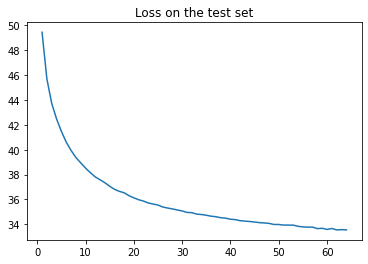

In [11]:
plot_loss(test_loss_per_epoch, 'Loss on the test set')

#### 32D latent space

In [12]:
vae = VAE(
    x_dim = 28 * 28,
    enc_hid_dim_1 = 256, 
    enc_hid_dim_2 = 256, 
    z_dim = 32, 
    dec_hid_dim_1 = 256, 
    dec_hid_dim_2 = 256
)

In [13]:
optimizer = optim.Adam(vae.parameters(), lr=1e-4)

In [14]:
min_loss = 1e6
epochs_without_improvement = 0
patience = 2
converged = False
test_loss_per_epoch = []
epoch = 0
while not converged:
    epoch += 1
    train(epoch, vae, train_loader, optimizer, loss_function, 10)
    test_loss = test(vae, test_loader, loss_function)
    test_loss_per_epoch.append(test_loss)

    if test_loss < min_loss:
        min_loss = test_loss
        epochs_without_improvement = 0
    else:
        epochs_without_improvement += 1
    
    converged = epochs_without_improvement >= patience
    print("Test set loss: {}. Converged: {}".format(test_loss, converged))


====> Epoch: 1 Average loss: 66.7180
Test set loss: 48.986180682373046. Converged: False
====> Epoch: 2 Average loss: 47.2143
Test set loss: 45.98048889770508. Converged: False
====> Epoch: 3 Average loss: 44.5543
Test set loss: 43.37294720458984. Converged: False
====> Epoch: 4 Average loss: 41.1006
Test set loss: 38.3669884765625. Converged: False
====> Epoch: 5 Average loss: 37.2125
Test set loss: 35.99289036254883. Converged: False
====> Epoch: 6 Average loss: 35.4856
Test set loss: 34.32744947509766. Converged: False
====> Epoch: 7 Average loss: 33.6943
Test set loss: 32.37407944335938. Converged: False
====> Epoch: 8 Average loss: 31.8687
Test set loss: 30.808246478271485. Converged: False
====> Epoch: 9 Average loss: 30.4295
Test set loss: 29.541399459838868. Converged: False
====> Epoch: 10 Average loss: 29.3480
Test set loss: 28.58330357055664. Converged: False
====> Epoch: 11 Average loss: 28.4796
Test set loss: 27.77174292602539. Converged: False
====> Epoch: 12 Average loss

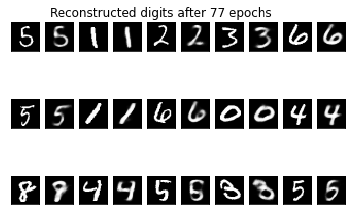

In [16]:
r_test_15 = reconstruct(vae, test_15)
plot_reconstructed(test_15.numpy(), r_test_15.numpy(), 'Reconstructed digits after {} epochs'.format(epoch - 1))

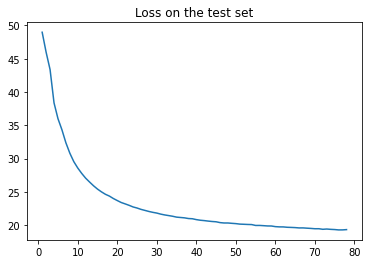

In [15]:
plot_loss(test_loss_per_epoch, 'Loss on the test set')